<a href="https://colab.research.google.com/github/sammyculotta/PHY122-Lab/blob/main/phy122_N3L_SC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHY-122 Lab 3

Michael Culotta

04/06/25

#  <font color='Red'> **Import Necessary Modules** </font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, array, zeros
from numpy.linalg import norm

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π =  np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [3]:
###
def rotation_xy(θ):
    """
    GIVEN: θ (in degrees)
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Definitions.** </font>

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font>

In [4]:
print( rotation_xy(2) )
print( rotation_xy(20) )
print( rotation_xy(87) )

[[ 0.9994 -0.0349  0.    ]
 [ 0.0349  0.9994  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.9397 -0.342   0.    ]
 [ 0.342   0.9397  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.0523 -0.9986  0.    ]
 [ 0.9986  0.0523  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font>

In [5]:
basis = (rotation_xy(74) @ np.eye(3)).T
print( basis )

[[ 0.2756  0.9613  0.    ]
 [-0.9613  0.2756  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font>

In [6]:
f_in  = array([0., -9.8, 0.])
print(f_in)

[ 0.  -9.8  0. ]


###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force (tentative. </font>

In [7]:
f_react = -f_in
print(f_react)

[-0.   9.8 -0. ]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font>

In [8]:
f_fric, f_normal, f_z = projection(basis, f_react)

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font>

In [9]:
μS = 1.0
μK = 0.5

if norm(f_fric) <= norm( μS * f_normal ): ## f_2
    None
if norm(f_fric) > norm( μS * f_normal ):
    f_2 = norm(μK * f_normal) * f_fric

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font>

In [10]:
net_force = f_fric + f_normal + f_z + f_in

print("Net Force is %4.3f N" %(norm(net_force) ) )

Net Force is 0.000 N


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above.

### Add this to f_in, do the results match from above? </font>

In [11]:
print("Net Force is %4.3f N" %( norm( Ramp(45, μS, μK, f_in) + f_in ) ) )

Net Force is 0.000 N


#  <font color='Red'> **Experiment 2: Varying Angle.** </font>

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font>

In [12]:
θs = arange(0,90,0.1) ## range of angles you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [13]:
f  = zeros(len(θs)) ## create an empty array to fill-in later of length θs
for i in range(len(θs)): ## for-loop over all configurations, e.g. array θs
    f[i] = norm( Ramp(θs[i], 1., 0.0, f_in) + f_in ) ## compute the net-force given the i-th θs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

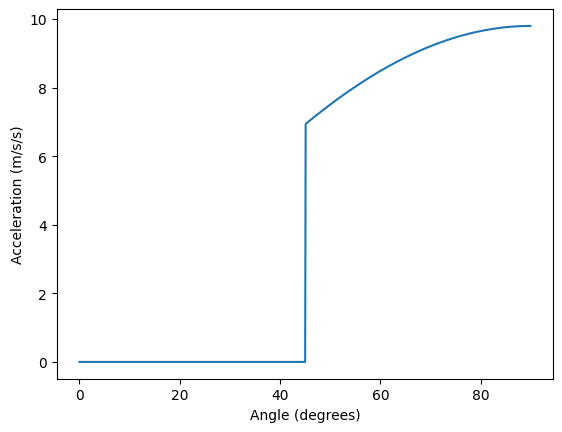

In [14]:
plt.plot(θs, f)
plt.xlabel("Angle (degrees)")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

In the above graph we see acceleration as a function of an angle, theta, in degrees. We see a constant zero acceleration up to the angle of 45 degrees. At 45 degrees the acceleration jumps to 7m/s^2 and increases like a square root function.

#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font>

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font>

In [15]:
μs = arange(0,5,0.1) ## range of static friction coefficients you wish to test

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font>

In [16]:
f  = zeros(len(μs)) ## create an empty array to fill-in later of length μs
for i in range(len(μs)): ## for-loop over all configurations, e.g. array μs
    f[i] = norm( Ramp(45, μs[i], 0.0, f_in) + f_in ) ## compute the net-force given the i-th μs configuration

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

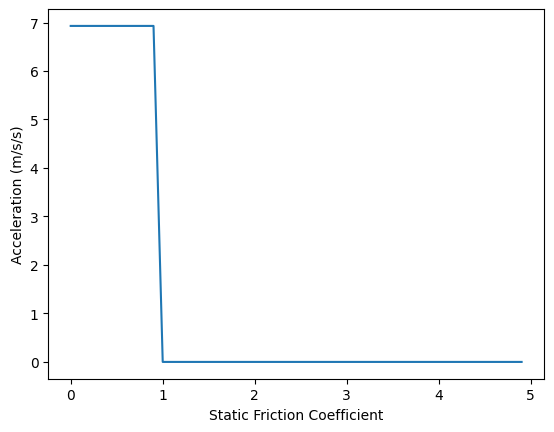

In [17]:
plt.plot(μs, f)
plt.xlabel("Static Friction Coefficient")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

In the above graph we see acceleration plotted against static friction coefficient. We see acceleration of 7 when there is a static friction coefficient from 0 to 1. We see no acceleration thereafter. The physics of this graph does not make much sense to me. I would expect static friction plotted against acceleration to increase linearly up to the point at which static friction is overcome, then would drop to 0. If kinetic friction were to be included on the same graph, instead of dropping to 0 the kinetic friction would take effect at a constant acceleration or force acting in the direction opposing motion.

#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font>

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font>

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk)
 </font>

In [18]:
θ  = 60   ## initial angle
μs = 1.30 ## static-friction coefficient
μk = 1.8  ## kinetic-friction coefficient

dt = 0.1 ## s  : detector/sim time resolution
mass = 2 ## kg : mass of particle
g = 10   ## m/s/s
x0 = array([0.,  10. , 0.]) ## m  : initial position
v0 = array([ 0.,  0. , 0.]) ## m/s: initial velocity
a0 = array([ 0., -1., 0.]) * mass * g ## m/s/s: initial acceleration

time = arange(0, 3, dt) ## s : time array (array containing all moments in time)

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font>

In [19]:
f_t_act = zeros((len(time), 3 )) ## empty force-trajectory array
f_t_act[:,1] = -1. * mass * g  ## fill-in all 1-axis ('y'-axis) entries to -mg.

###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font>

In [20]:
x_t = zeros((len(time), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = zeros((len(time), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(time), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = (Ramp(θ, μs, μk, f_t_act[0]) + f_t_act[0] )/mass

for t in range(1,len(time)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + a_t[t-1] * dt*dt/2 ## Velocity-Verlet Step 1 : find new position from old data
    a_t[t] = (Ramp(θ, μs, μk, f_t_act[t]) + f_t_act[t] )/mass ## compute new acceleration from the net-force
    v_t[t] = v_t[t-1] + (a_t[t-1] + a_t[t]) * dt/2 ## compute new velocity

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font>

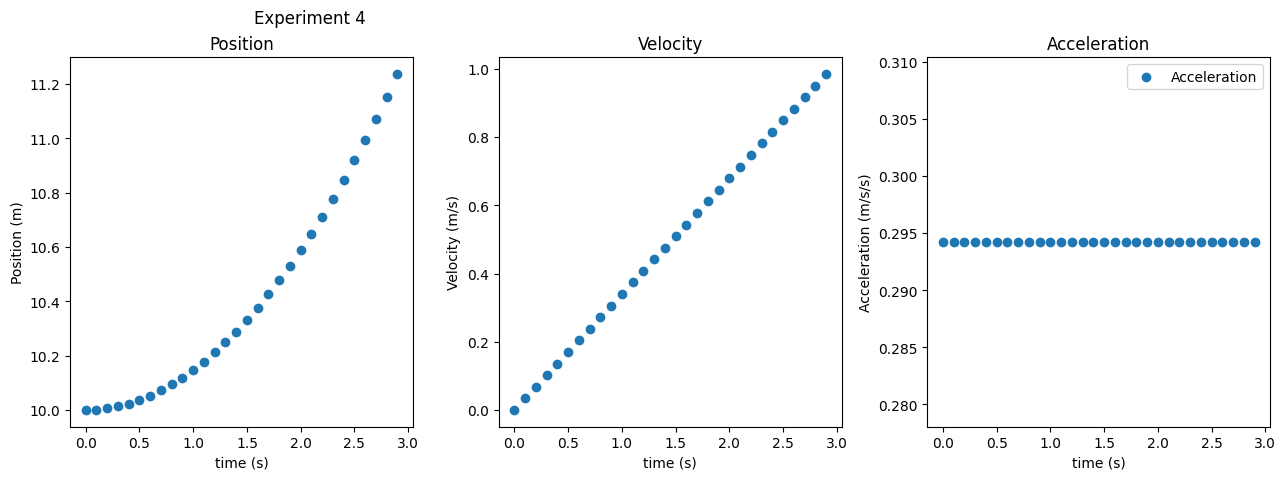

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment 4')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,1])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

#ax2.scatter(time, v_t[:,1])
ax2.scatter(time, norm(v_t, axis=1))
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(time, a_t[:,1], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

In the above plots we see constant acceleration with respect to time. With constant, non-zero acceleration, we have linear velocity with respect to time. Finally, we see a quadratic position with respect to time. Since there is kinetic friction involved in this experiment, we expect that this friction will reduce the acceleration, which will reduce the overall slope of the velocity and slow the change in position with respect to time. Clearly, there is enough force, and the angle of the ramp is steep enough to overcome the force of static friction, as seen through net positive acceleration and motion of the object.

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demonstrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>


In this lab we see the effects of reactive static and kinetic friction on the motion of an object. We see that for an object to move, the net force on the object must be greater than the force of static friction. The magnitude of the reactive static friction force grows as the force on the object increases, up to the point at which the static friction force is overcome. In this lab the change in the force is due to the manipulation of the angle theta, or the angle of the incline. We see that once an object begins to move, if the movement is on a surface containing friction, the friction force will reduce speed opposite the direction of motion.  Furthermore, we see how the angle of an inclined plane affects the motion of an object, especially when it first starts to move. If the angle of the ramp is lower, it will require a larger force to overcome static friction. If the angle of the ramp is higher, it will require less force to overcome the effects of static friction. However, if the angle is perpendicular to the horizontal, static friction alone would not be enough to hold the object against the wall. For the object to remain stuck to the wall, an additional push force would have to be present. In the opposite case, if the surface is perfectly horizontal, if there is no static friction coefficient, the object still would not move assuming the net forces are in equilibrium (in this case the normal force, and mg would balance).

###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

see above conclusion.

###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>

see above conclusion.